In [1]:
import pandas as pd
import missingno as msno
import os
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn as sk
import matplotlib.pyplot as plt


# Analyse et nettoyage des données

### Chargement des données

In [2]:
# Chargement du dataset
df = pd.read_csv('kc_house_data.csv', encoding='utf-8')

In [3]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

### Exploration du jeu de données

In [4]:
# vérification des doublons
print(df.duplicated().value_counts()) #ajouter param subset dans duplicated

False    21613
dtype: int64


In [5]:
# vérif données nulles
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
# Visualisation des 3 premières lignes 
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [7]:
# Exploration des valeurs numériques
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Préparation du jeu de données

In [8]:
# Transformer la colonne date avec des valeurs dans le format de date
df['dates'] = pd.to_datetime(df['date'])


In [9]:
df['month'] = df['dates'].dt.month
df['day'] = df['dates'].dt.day
df['year'] = df['dates'].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  object        
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [11]:
df = df.drop("date", axis=1)

In [12]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
df.loc[df["bedrooms"] == 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dates,month,day,year
875,6306400140,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014-06-12,6,12,2014
3119,3918400017,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015-02-05,2,5,2015
3467,1453602309,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,2014-08-05,8,5,2014
4868,6896300380,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,2014-10-02,10,2,2014
6994,2954400190,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014-06-24,6,24,2014
8477,2569500210,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2014-11-17,11,17,2014
8484,2310060040,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,2014-09-25,9,25,2014
9773,3374500520,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015-04-29,4,29,2015
9854,7849202190,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014-12-23,12,23,2014
12653,7849202299,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,2015-02-18,2,18,2015


In [14]:
# on supprime la maison de 33 chambres qui est de toute évidence une erreur
df = df[df["bedrooms"] != 33]
df = df[df["bedrooms"] != 0]
df = df[df["bathrooms"] != 0]

In [15]:
df["sqft_lot"].describe(percentiles=[0.01, 0.05,0.1,0.25,0.5, 0.75,0.9,0.95,0.99,0.995,0.999,0.9999])

count     2.159600e+04
mean      1.509983e+04
std       4.141355e+04
min       5.200000e+02
1%        1.013950e+03
5%        1.800750e+03
10%       3.322500e+03
25%       5.040000e+03
50%       7.619000e+03
75%       1.068550e+04
90%       2.137200e+04
95%       4.330875e+04
99%       2.130080e+05
99.5%     2.474505e+05
99.9%     4.959790e+05
99.99%    1.066219e+06
max       1.651359e+06
Name: sqft_lot, dtype: float64

<AxesSubplot:>

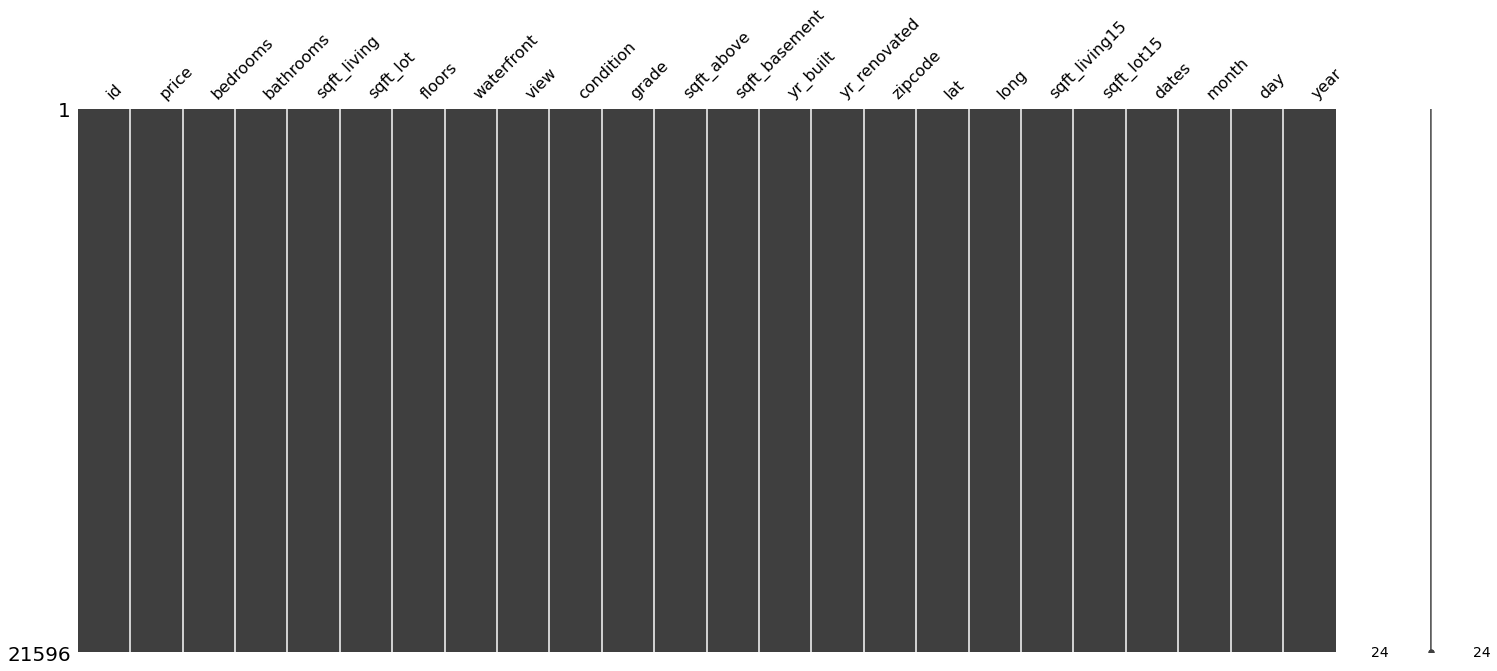

In [16]:
msno.matrix(df)

In [17]:
df["waterfront"].value_counts()

0    21433
1      163
Name: waterfront, dtype: int64

In [18]:
data_types_zip = {'zipcode': str} 
df = df.astype(data_types_zip)  # changer le zipcode de int à object 
df.dtypes

id                        int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dates            datetime64[ns]
month                     int64
day                       int64
year                      int64
dtype: object

In [19]:
df_dum = pd.get_dummies(df)
df_dum

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,dates,month,day,year,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014-10-13,10,13,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014-12-09,12,9,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015-02-25,2,25,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014-12-09,12,9,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015-02-18,2,18,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014-05-21,5,21,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015-02-23,2,23,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014-06-23,6,23,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015-01-16,1,16,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Visualisation du jeu de données

In [20]:
corr = df.corr()

In [21]:
corr_to_price = df.drop('price', axis=1).corrwith(df['price'])

<AxesSubplot:>

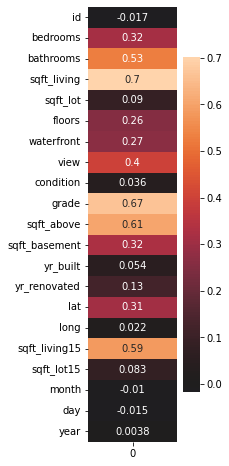

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(2,8)

sns.heatmap(pd.DataFrame(corr_to_price), center=0, ax=ax, annot=True)

In [23]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

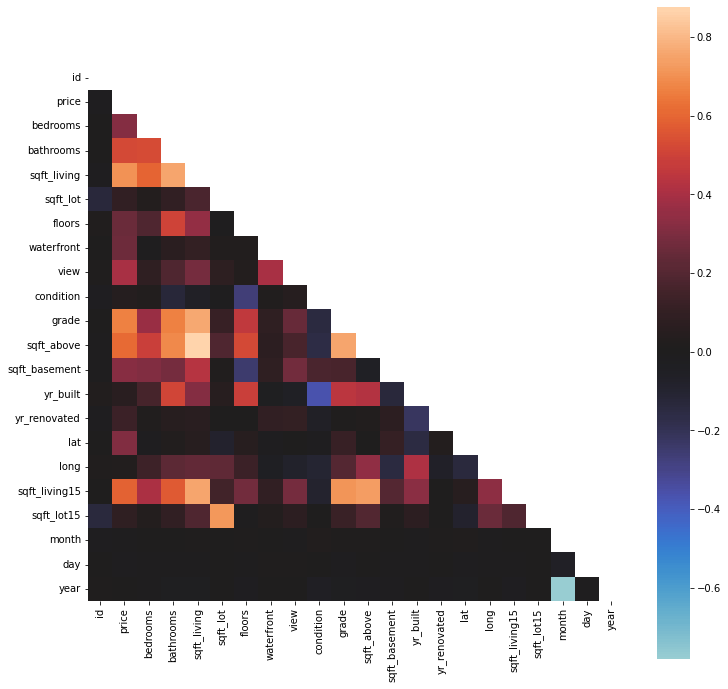

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corr, mask=mask, center = 0, square =True, ax = ax, annot=False)
plt.show()

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

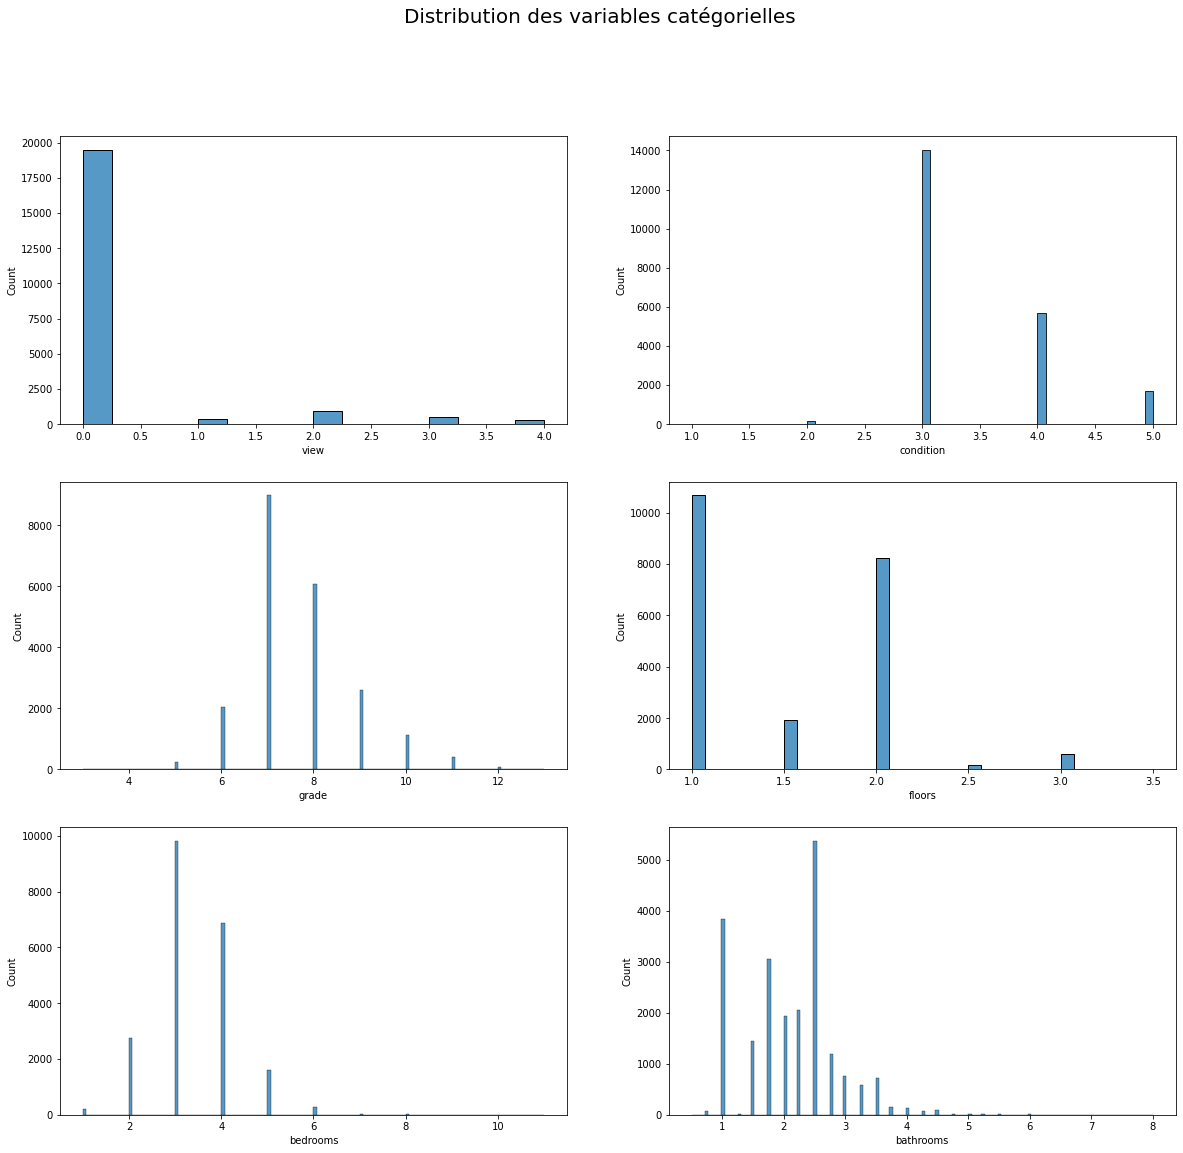

In [25]:
fig, ax = plt.subplots(3,2, figsize = (20,18))
plt.suptitle("Distribution des variables catégorielles", fontsize = 20)
sns.histplot(ax=ax[0,0], x="view", data=df)
sns.histplot(ax=ax[0,1], x="condition", data=df)
sns.histplot(ax=ax[1,0], x="grade", data=df)
sns.histplot(ax=ax[1,1], x="floors", data=df)
sns.histplot(ax=ax[2,0], x="bedrooms", data=df)
sns.histplot(ax=ax[2,1], x="bathrooms", data=df)


In [26]:
df.corrwith(df.price).sort_values()

id              -0.016727
day             -0.014699
month           -0.009954
year             0.003757
long             0.022103
condition        0.036000
yr_built         0.053995
sqft_lot15       0.082841
sqft_lot         0.089885
yr_renovated     0.126418
floors           0.256831
waterfront       0.266438
lat              0.306772
bedrooms         0.315966
sqft_basement    0.323772
view             0.397323
bathrooms        0.525915
sqft_living15    0.585273
sqft_above       0.605395
grade            0.667935
sqft_living      0.701921
price            1.000000
dtype: float64

In [27]:
df1 = df.drop(["day", "month", "id"], axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dates,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015


<AxesSubplot:xlabel='waterfront', ylabel='price'>

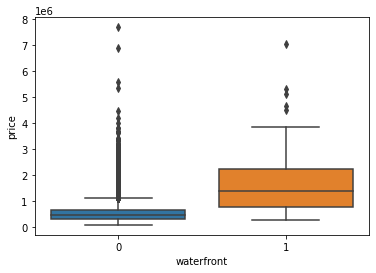

In [28]:
sns.boxplot(x="waterfront", y="price", data=df)


(0.0, 8081100.0)

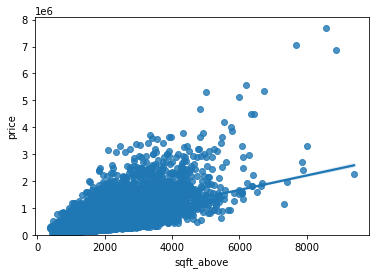

In [29]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

price / bedrooms


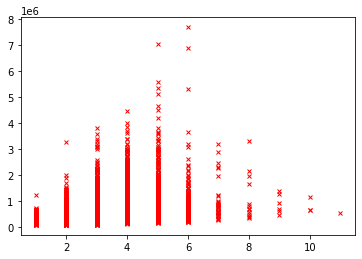

price / bathrooms


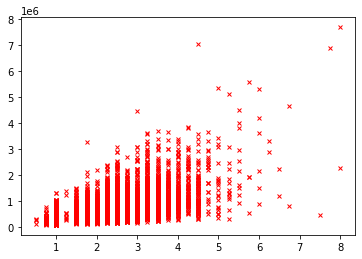

price / sqft_living


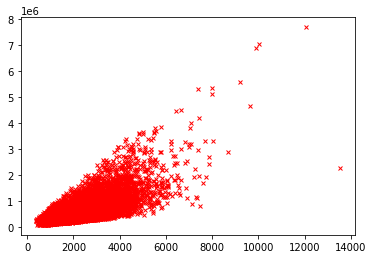

price / view


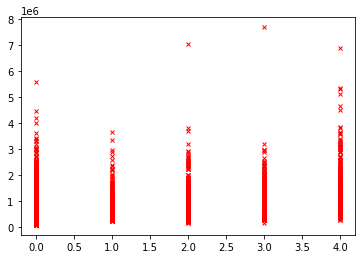

price / grade


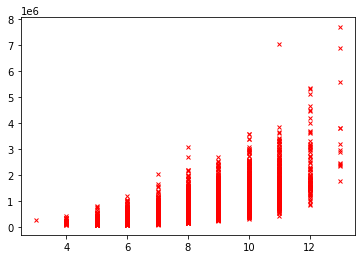

price / sqft_above


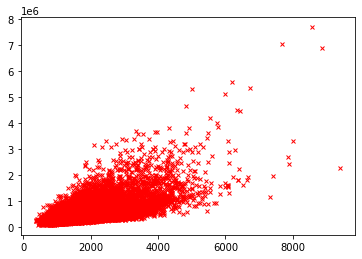

price / sqft_living15


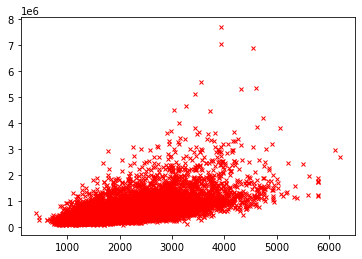

In [30]:
for index in df1:
    if index in ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "bedrooms"]:
        print("price / " + index)
        plt.plot(df1[index], df['price'], 'rx', markersize=4)
        plt.show()

In [31]:
fig = px.density_mapbox(df, lat=df.lat,
                        lon=df.long,
                        z=np.log(df.price), radius=3,
                        center=dict(lat=47.5, lon=-122.4), zoom=8,
                        mapbox_style="stamen-terrain")
fig.show()

In [32]:
df = df.drop(["dates"], axis=1)

In [33]:
df = df.drop(["id","month","day", "lat", "long"], axis=1)

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015


In [35]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year'],
      dtype='object')

### Exportation du Dataframe dans le nouveau fichier CSV

In [36]:
# Export du Dataframe dans un nouveau fichier .csv
df.to_csv('kc_house_data_clean.csv', index=False)